In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

In [4]:
from matplotlib import pyplot as plt

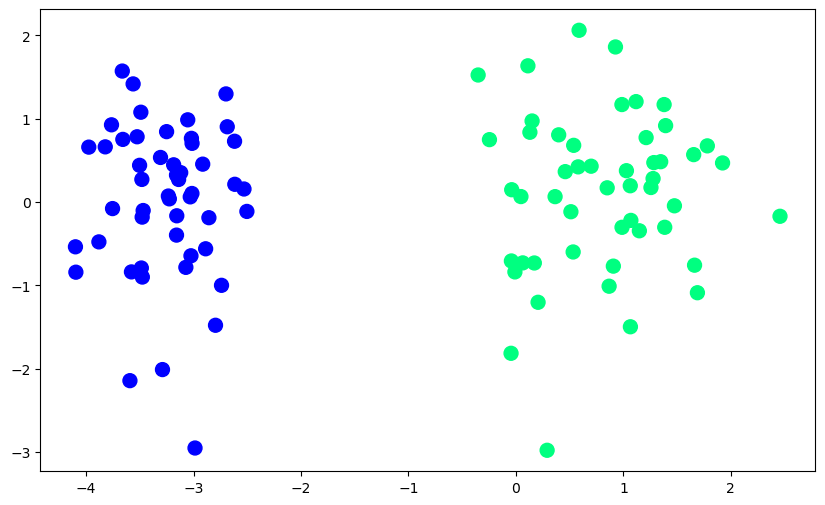

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [12]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty=None,solver='sag')
lr.fit(X,y)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'sag'
,max_iter,100
,multi_class,'deprecated'


In [13]:
print(lr.coef_)
print(lr.intercept_)

[[4.81753894 0.21874575]]
[5.78460817]


In [15]:
m1=-(lr.coef_[0][0]/lr.coef_[0][1])
b1=-(lr.intercept_/lr.coef_[0][1])

In [16]:
x_input=np.linspace(-3,3,100)
y_input=m1*x_input+b1

In [25]:
def gd(X,y):
    X=np.insert(X,0,1,axis=1)
    w=np.ones(X.shape[1])
    lr=0.5

    for i in range(2500):
        y_hat=sigmoid(np.dot(X,w))
        w=w+lr*(np.dot(y-y_hat,X)/X.shape[0])
    return w[1:],w[0]

In [23]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [26]:
coef_,intercept_=gd(X,y)

In [27]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [28]:
x_input1=np.linspace(-3,3,100)
y_input1=m*x_input1+b

(-3.0, 2.0)

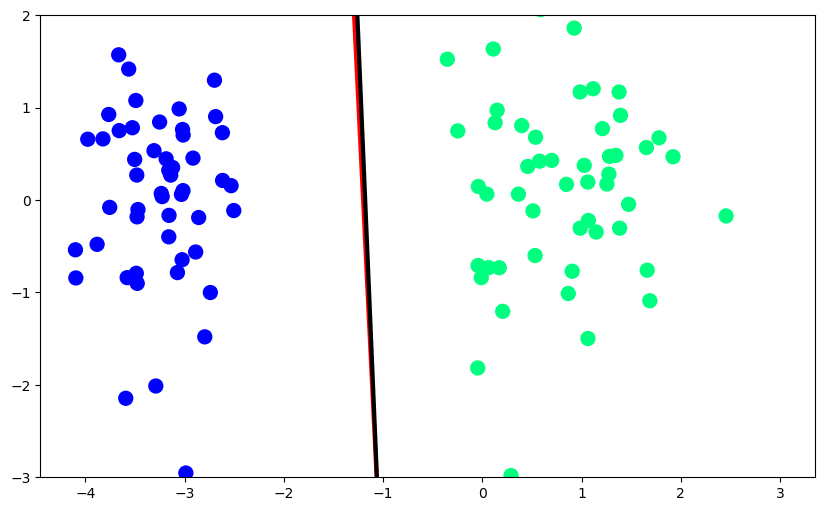

In [29]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)